In [2]:
import pandas as pd
df_a = pd.read_csv('bean-interpolated.csv', parse_dates=['Date'], index_col='Date')

# Load the data from dollar-carrot.csv
df_weather_kandy = pd.read_csv('Weather_Kandy.csv', parse_dates=['Date'], index_col='Date')
# Display the first few rows of the dataframes
print("First few rows of a.csv:")
print(df_a.head())


# Merge the dataframes on the 'date' column
# Assuming 'dollar-carrot.csv' contains columns such as 'dollar_rate_carrot' or similar to avoid naming conflicts
df_merged = df_a.merge(df_weather_kandy, on='Date', how='inner')

# Display the first few rows of the merged and filtered dataframe
print("\nFirst few rows of the merged and filtered dataframe:")
print(df_merged.head())

# Display the column names of the merged dataframe
print("Column names in df_merged:", df_merged.columns)

# Save the filtered dataframe to 'beans-dollar.csv'
# df_merged.to_csv('beannnns-dollar.csv', index=False)

print("Filtered CSV file 'beans-dollar.csv' has been created.")




First few rows of a.csv:
            Bean_Kandy_price
Date                        
2020-01-01              95.0
2020-01-02              95.0
2020-01-03              95.0
2020-01-04              95.0
2020-01-05              95.0

First few rows of the merged and filtered dataframe:
            Bean_Kandy_price  rain_sum
Date                                  
2020-01-01              95.0       0.4
2020-01-02              95.0       0.2
2020-01-03              95.0       0.0
2020-01-04              95.0       0.2
2020-01-05              95.0       0.0
Column names in df_merged: Index(['Bean_Kandy_price', 'rain_sum'], dtype='object')
Filtered CSV file 'beans-dollar.csv' has been created.


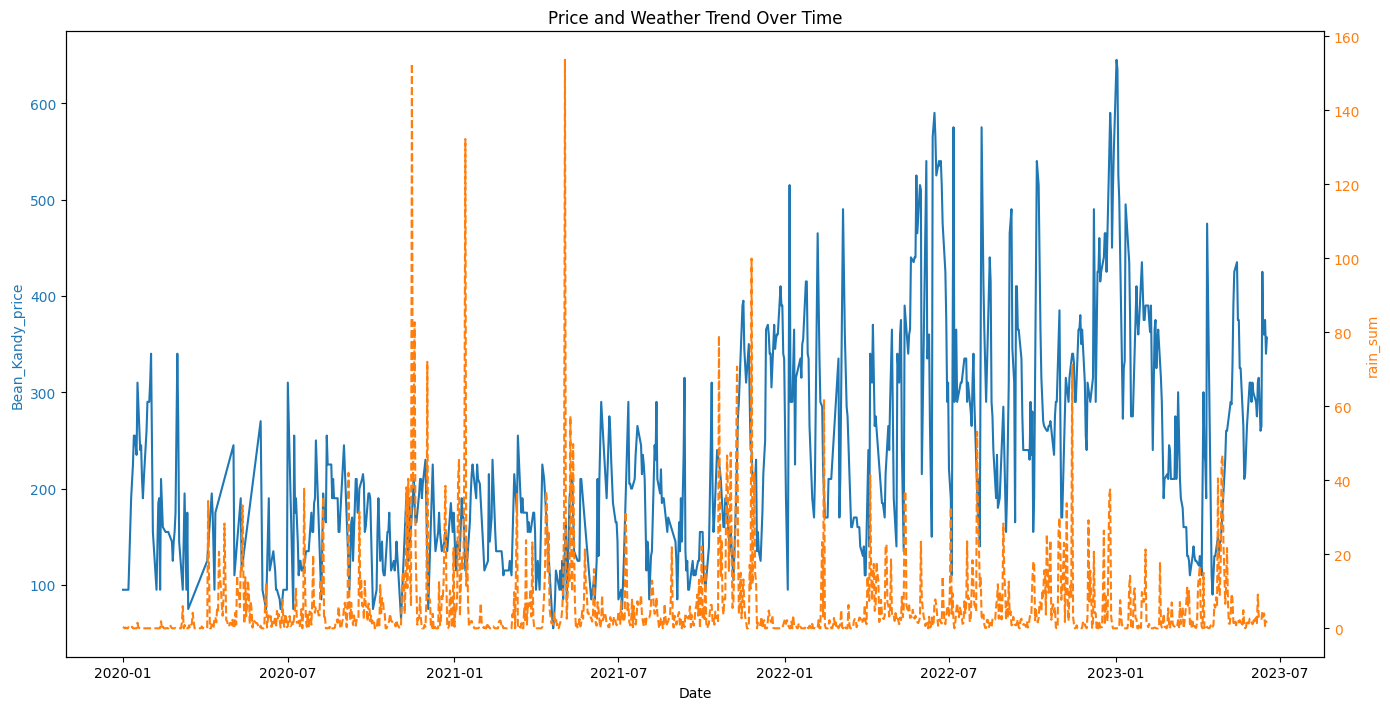

In [3]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(14, 7))

df = df_merged
# Plot price
ax1.set_xlabel('Date')
ax1.set_ylabel('Bean_Kandy_price', color='tab:blue')
ax1.plot(df.index, df['Bean_Kandy_price'], color='tab:blue', label='Bean_Kandy_price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for dollar rate
ax2 = ax1.twinx()
ax2.set_ylabel('rain_sum', color='tab:orange')
ax2.plot(df.index, df['rain_sum'], color='tab:orange', linestyle='--', label='rain_sum')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add legends
fig.tight_layout()
plt.title('Price and Weather Trend Over Time')
plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler_price = MinMaxScaler(feature_range=(0, 1))
scaler_dollar = MinMaxScaler(feature_range=(0, 1))

df['Bean_Kandy_price'] = scaler_price.fit_transform(df[['Bean_Kandy_price']])
df['rain_sum'] = scaler_dollar.fit_transform(df[['rain_sum']])

# Create training and testing datasets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [5]:
import numpy as np
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Using the last 60 days to predict the next day's price
look_back = 60
X_train, y_train = create_dataset(train.values, look_back)
X_test, y_test = create_dataset(test.values, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))  # 2 features: price and dollar rate
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 2)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0623 - val_loss: 0.0214
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0156 - val_loss: 0.0188
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0134 - val_loss: 0.0146
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0116 - val_loss: 0.0139
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0122 - val_loss: 0.0156
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0106 - val_loss: 0.0114
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0127 - val_loss: 0.0103
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0077 - val_loss: 0.0097
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0114 - val_loss: 0.0096
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0093 - val_loss: 0.0117
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0

In [8]:
# Predict using the trained model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Invert predictions and actual values from scaled form back to original prices
train_predictions = scaler_price.inverse_transform(train_predictions)
y_train_actual = scaler_price.inverse_transform([y_train])
test_predictions = scaler_price.inverse_transform(test_predictions)
y_test_actual = scaler_price.inverse_transform([y_test])


from sklearn.metrics import mean_squared_error, mean_squared_log_error


y_test_actual_flat = y_test_actual.flatten()
test_predictions_flat = test_predictions.flatten()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual_flat, test_predictions_flat)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
y_test_actual_flat_safe = np.maximum(y_test_actual_flat, 1e-10)
test_predictions_flat_safe = np.maximum(test_predictions_flat, 1e-10)

rmsle = np.sqrt(mean_squared_log_error(y_test_actual_flat_safe, test_predictions_flat_safe))
print(f'Root Mean Squared Logarithmic Error (RMSLE): {rmsle}')
percentage_errors = np.abs((y_test_actual_flat - test_predictions_flat) / y_test_actual_flat) * 100

# Calculate mean percentage error
mean_percentage_error = np.mean(percentage_errors)
print(f'Mean Percentage Error (MPE): {mean_percentage_error:.2f}%')



30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error (MSE): 2435.9786055581444
Root Mean Squared Error (RMSE): 49.35563397990288
Root Mean Squared Logarithmic Error (RMSLE): 0.15741544844002836
Mean Percentage Error (MPE): 11.33%


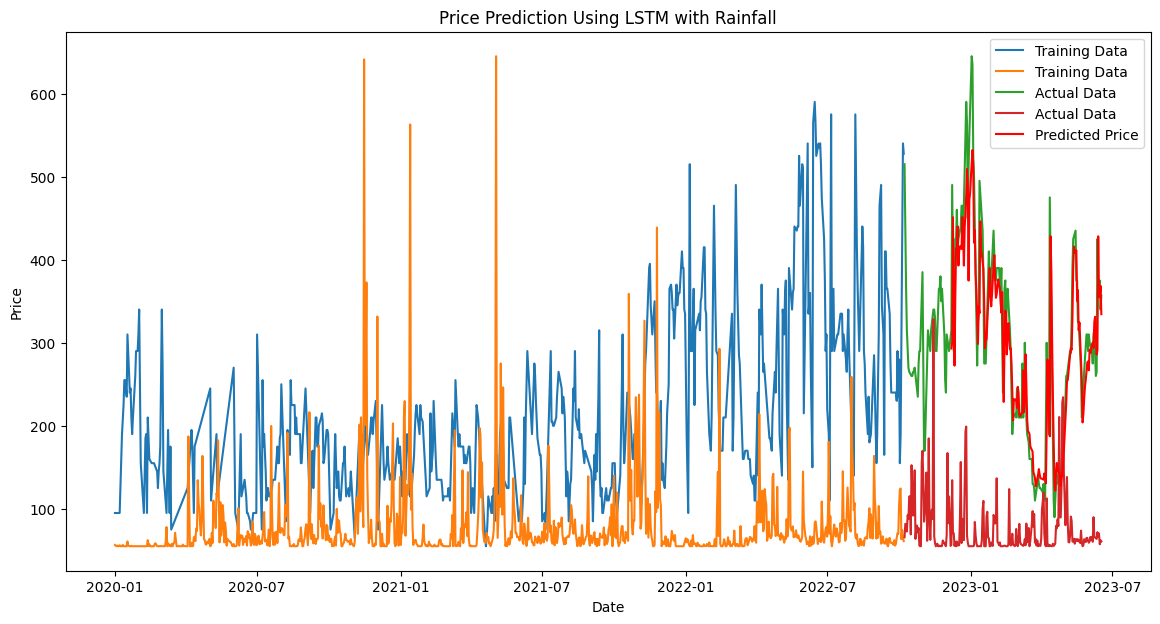

In [10]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
filtered_index_train = df.index[:train_size][df.index[:train_size] >= '2020-01-01']
filtered_index_test = df.index[train_size:][df.index[train_size:] >= '2020-01-01']
filtered_index_predictions = df.index[train_size+look_back:][df.index[train_size+look_back:] >= '2020-01-01']

plt.plot(filtered_index_train, scaler_price.inverse_transform(train.values), label='Training Data')
plt.plot(filtered_index_test, scaler_price.inverse_transform(test.values), label='Actual Data')
plt.plot(filtered_index_predictions, test_predictions, label='Predicted Price', color='red')

# filtered_index_train = df.index[:train_size][df.index[:train_size] >= '2020-01-01']
# filtered_index_test = df.index[train_size:][df.index[train_size:] >= '2020-01-01']
# filtered_index_predictions = df.index[train_size+look_back:][df.index[train_size+look_back:] >= '2020-01-01']

# plt.plot(filtered_index_train, scaler.inverse_transform(train.values[df.index[:train_size] >= '2020-01-01']), label='Training Data')
# plt.plot(filtered_index_test, scaler.inverse_transform(test.values[df.index[train_size:] >= '2020-01-01']), label='Actual Price')
# plt.plot(filtered_index_predictions, test_predictions[df.index[train_size+look_back:] >= '2020-01-01'], label='Predicted Price', color='red')

plt.title('Price Prediction Using LSTM with Rainfall')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

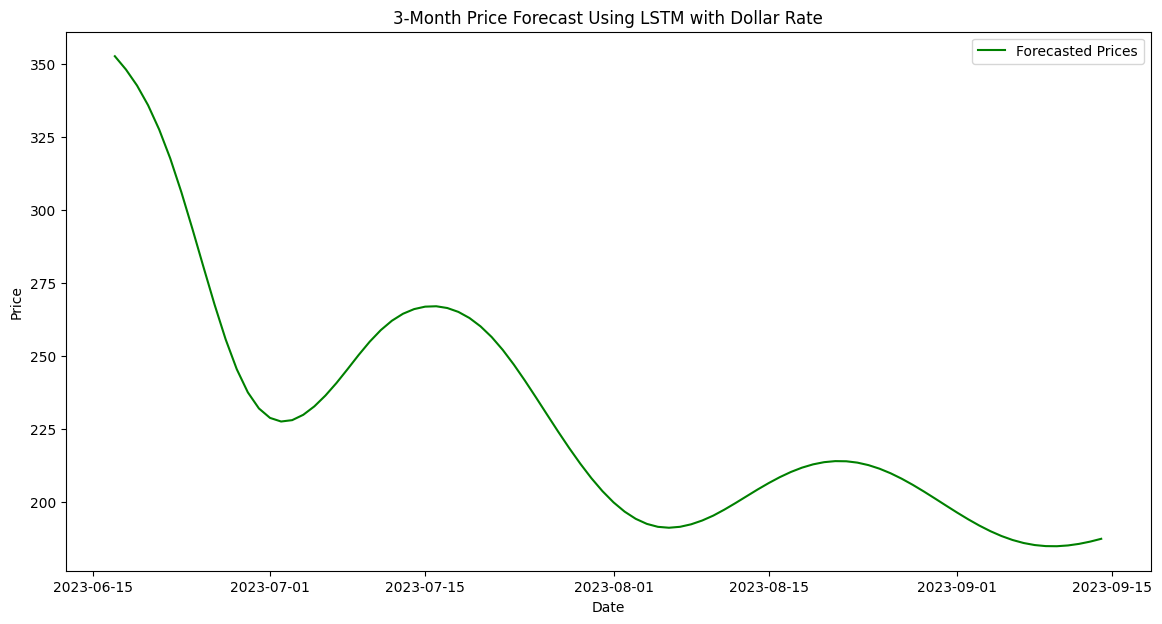

In [11]:
# Use the last part of the test set for prediction
last_sequence = df[-look_back:].values
forecast_input = last_sequence
forecast = []

# Forecast the next 90 days (approx. 3 months)
for _ in range(90):
    forecast_input_reshaped = np.reshape(forecast_input, (1, look_back, 2))
    next_price = model.predict(forecast_input_reshaped)
    forecast.append(next_price[0, 0])
    # Update the forecast input with the new forecasted price
    new_dollar_rate = forecast_input[-1, 1]  # assuming dollar rate remains constant
    forecast_input = np.append(forecast_input[1:], [[next_price[0, 0], new_dollar_rate]], axis=0)

# Invert the forecasted values to the original price scale
forecast = scaler_price.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot forecasted prices
future_dates = pd.date_range(start=df.index[-1], periods=90)
plt.figure(figsize=(14, 7))
plt.plot(future_dates, forecast, label='Forecasted Prices', color='green')
plt.title('3-Month Price Forecast Using LSTM with Dollar Rate')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
